# Loading Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

In [3]:
data_df = pd.read_csv('/home/amy/work/RIT/TDess/DSCI-601-Amy/Data/Combined/combined_AAPL.csv')

# Initial Statistical and Exploratory Analysis

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7809 entries, 0 to 7808
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         7809 non-null   object 
 1   RET          7809 non-null   float64
 2   VOL_CHANGE   7809 non-null   float64
 3   BA_SPREAD    7809 non-null   float64
 4   ILLIQUIDITY  7809 non-null   float64
 5   sprtrn       7809 non-null   float64
 6   TURNOVER     7809 non-null   float64
 7   DJI_Return   7809 non-null   float64
dtypes: float64(7), object(1)
memory usage: 488.2+ KB


## About the data

#### Date - Timestamp for the data

#### RET - Return on a stock over a given period of time

#### Vol_Change - Changes in trading volume. Increase in volume can signify high interest, while a decrease might suggest less interest.

#### BA_Spread - Difference between the highest price a buyer is willing to pay (bid) and the lowest price a seller is willing to accept (ask). A narrower spread often indicates a more liquid market or higher market efficiency, whereas a wider spread can indicate lower liquidity or higher risk.

#### Illiquidity - A measure of the difficulty of trading a stock without affecting its price. High illiquidity means the stock is not easily tradable without significant price changes, which can increase the cost of trading and the risk.

#### Sprtrn - Return of the S&P 500 index, which is a market-capitalization-weighted index of the 500 largest U.S. publicly traded companies. The S&P 500 is a common benchmark for U.S. stock performance.

#### Turnover - refers to the total volume of shares traded during a specific period divided by the total shares outstanding. High turnover can indicate high trading activity, suggesting interest or volatility in the stock.

#### Dji_Return - return on the Dow Jones Industrial Average, another major stock market index in the United States. It consists of 30 large, publicly-owned companies based in the United States.

In [5]:
# Converting date from object to datetime 
data_df['date'] = pd.to_datetime(data_df['date'])

In [28]:
import pandas as pd

pd.options.display.float_format = '{:,.2f}'.format

def summary(df):
    print(f'Data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summ['Missing #'] = df.isnull().sum().values 
    summ['Missing %'] = (df.isnull().sum().values / len(df)) * 100
    summ['Unique Values'] = df.nunique().values

    # Using describe to get summary statistics for numeric columns
    desc = df.describe().transpose()
    summ['Min'] = desc['min']
    summ['Max'] = desc['max']
    summ['Mean'] = desc['mean']
    summ['Std Dev'] = desc['std']

    # Handling non-numeric data which won't appear in desc
    for col in df.select_dtypes(include=['object', 'category']):
        summ.loc[col, ['Min', 'Max', 'Mean', 'Std Dev']] = 'N/A'  # Non-applicable for categorical data

    # Additional data points for deeper insight
    if len(df) >= 3:
        summ['First Value'] = df.iloc[0].values
        summ['Second Value'] = df.iloc[1].values
        summ['Third Value'] = df.iloc[2].values
    elif len(df) > 0:
        # Ensure at least one row is in the data
        summ['First Value'] = df.iloc[0].values
        summ['Second Value'] = 'N/A'
        summ['Third Value'] = 'N/A'
    else:
        summ['First Value'] = 'N/A'
        summ['Second Value'] = 'N/A'
        summ['Third Value'] = 'N/A'

    return summ

summary(data_df)


Data shape: (7809, 8)


,Data Type,Missing #,Missing %,Unique Values,Min,Max,Mean,Std Dev,First Value,Second Value,Third Value
date,datetime64[ns],0,0.00,7809,1992-01-02 00:00:00,2022-12-30 00:00:00,2007-06-28 23:23:40.361121792,NaN,1992-01-02 00:00:00,1992-01-03 00:00:00,1992-01-06 00:00:00
RET,float64,0,0.00,6977,-0.52,0.33,0.00,0.03,0.06,-0.01,-0.02
VOL_CHANGE,float64,0,0.00,7809,-0.85,15.82,0.10,0.62,0.72,-0.17,-0.40
BA_SPREAD,float64,0,0.00,5146,-0.01,0.02,0.00,0.00,0.01,0.00,0.00
ILLIQUIDITY,float64,0,0.00,3912,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00
sprtrn,float64,0,0.00,6897,-0.12,0.12,0.00,0.01,0.00,0.00,-0.00
TURNOVER,float64,0,0.00,7809,2.00,397.42,19.08,17.30,17.42,14.41,8.65
DJI_Return,float64,0,0.00,7797,-0.13,0.11,0.00,0.01,0.00,0.01,-0.00


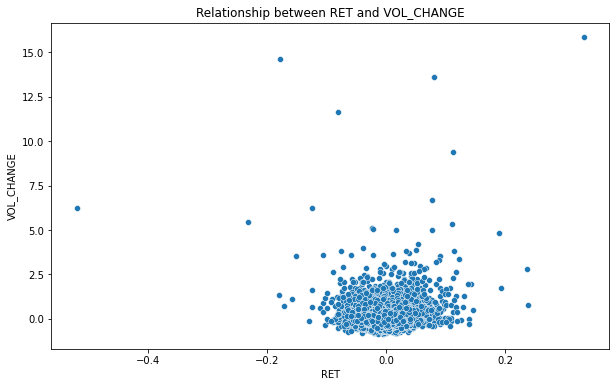

In [31]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_df, x='RET', y='VOL_CHANGE')
plt.title('Relationship between RET and VOL_CHANGE')
plt.xlabel('RET')
plt.ylabel('VOL_CHANGE')
plt.show()


In [41]:
# Getting the error [ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.]

# need to convert df to numpy array before visualizing
ret_array = data_df['RET'].to_numpy()
vol_change_array = data_df['VOL_CHANGE'].to_numpy()

Text(0.5, 1.0, 'Histogram of VOL_CHANGE')

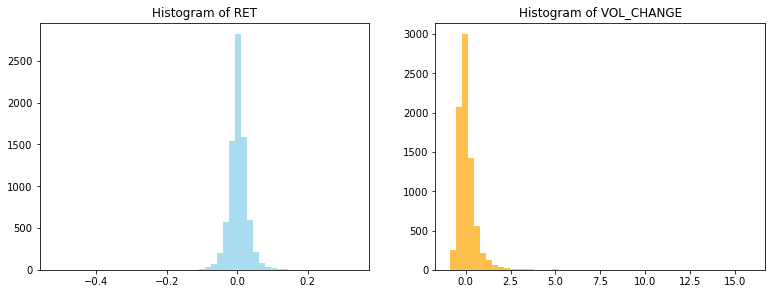

In [58]:
ret_reshaped = ret_array[:, None]  # Correct reshaping after conversion

# Set up the matplotlib figure
plt.figure(figsize=(13, 10))

plt.subplot(2, 2, 1)  # 2 rows, 2 columns, 1st subplot
plt.hist(data_df['RET'], bins=50, color='skyblue', alpha=0.7)
plt.title('Histogram of RET')

plt.subplot(2, 2, 2) 
plt.hist(data_df['VOL_CHANGE'], bins=50, color='orange', alpha=0.7)
plt.title('Histogram of VOL_CHANGE')



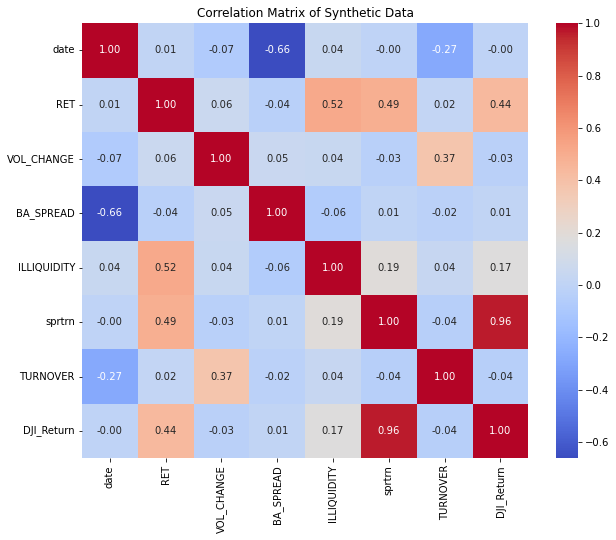

In [45]:
correlation_matrix = data_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Synthetic Data')
plt.show()

#### Time Series Decomposition
- Decomposing RET and Vol_Change time series data to view trends, seasonal patterns, and residuals.

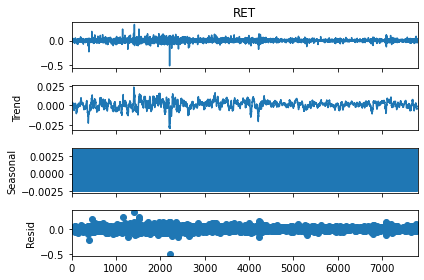

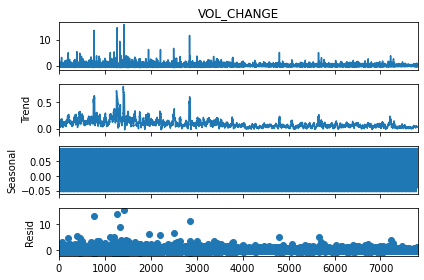

In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose RET
result_ret = seasonal_decompose(data_df['RET'], model='additive', period=30)  # Adjust period based on your data's frequency
result_ret.plot()
plt.show()

# Decompose VOL_CHANGE
result_vol_change = seasonal_decompose(data_df['VOL_CHANGE'], model='additive', period=30)
result_vol_change.plot()
plt.show()


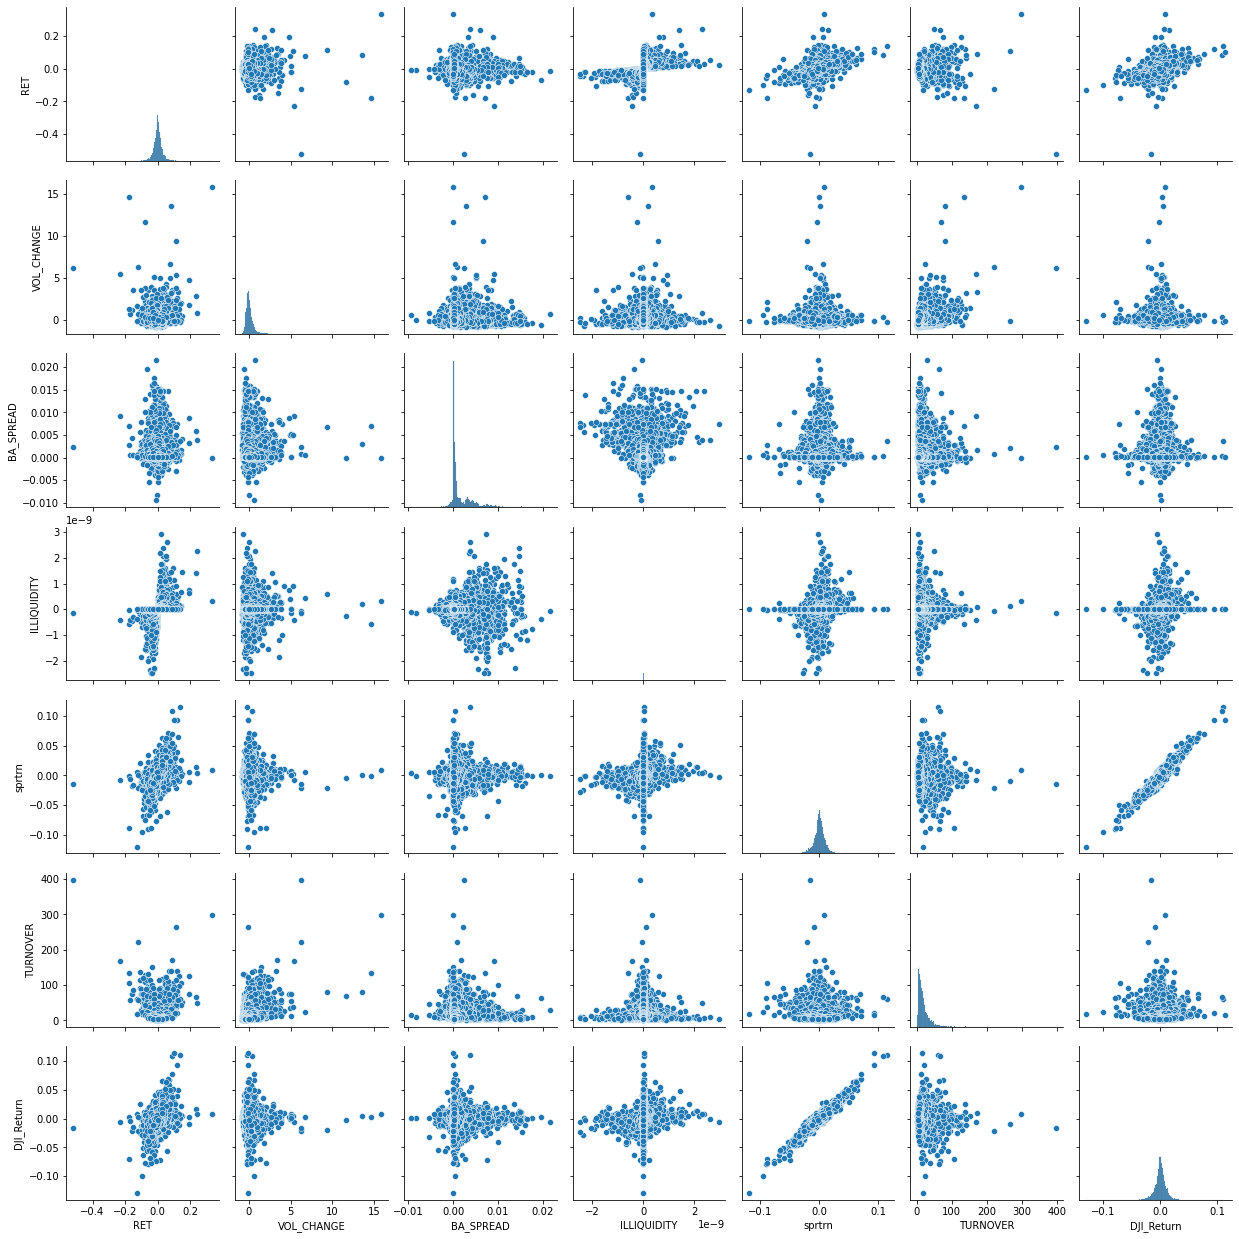

In [50]:
sns.pairplot(data_df)
plt.show()

#### The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period of our choosing.

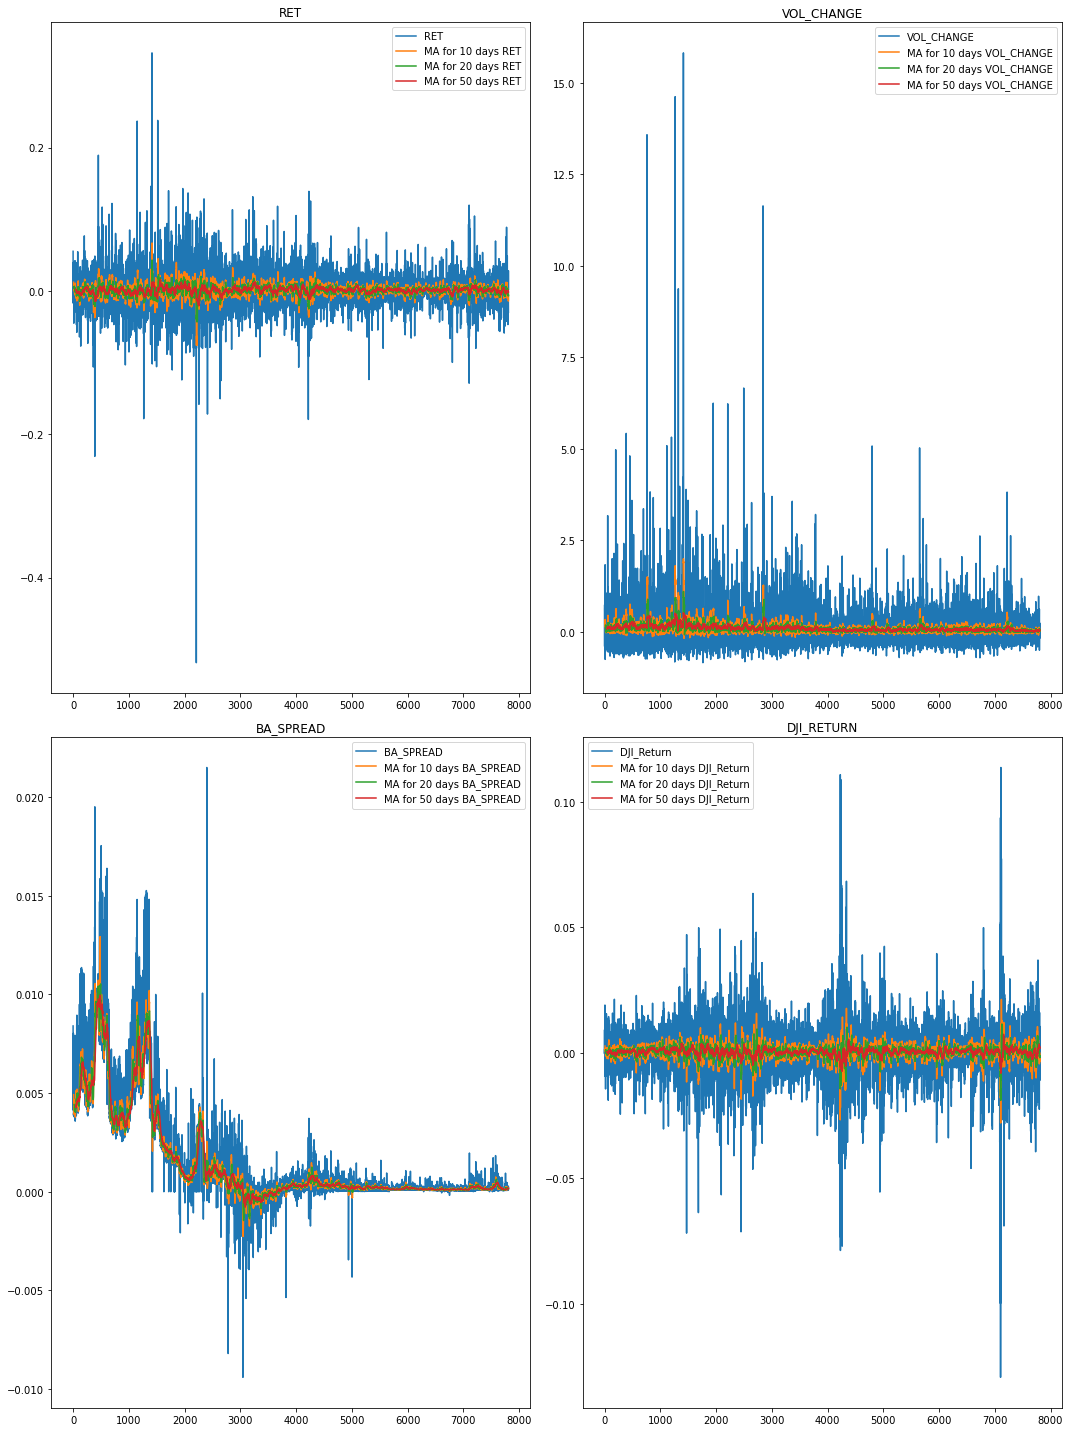

In [53]:
# Moving averages settings
ma_day = [10, 20, 50]
metrics = ['RET', 'VOL_CHANGE', 'BA_SPREAD', 'DJI_Return']

# Calculating moving averages for each metric
for ma in ma_day:
    for metric in metrics:
        column_name = f"MA for {ma} days {metric}"
        data_df[column_name] = data_df[metric].rolling(window=ma).mean()

# Creating subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 20))

# Plotting each metric with its moving averages
for i, metric in enumerate(metrics):
    ax = axes[i // 2, i % 2]
    data_df[[metric, f'MA for 10 days {metric}', f'MA for 20 days {metric}', f'MA for 50 days {metric}']].plot(ax=ax)
    ax.set_title(f'{metric.upper()}')

# Adjust layout
fig.tight_layout()
plt.show()